# Exploratory Analysis

1. Distribution of affirmation rates for both rumours

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style("whitegrid",{'axes.spines.left' : False,
                           'axes.spines.right': False,
                           'axes.spines.top': False,
                           'grid.linestyle': ':'})

## Cleaning Data

### Participant + Prelim Questionnaire Data

In [3]:
from tableone import TableOne
participants = pd.read_json("../data/mock_data/participant-schema.json",orient="records")
dummies = ["gender","affiliatedMovements","socialMedias"]
for col in dummies:
    participants = participants.explode(col)
participants = pd.get_dummies(participants,columns=dummies).max(level=0)
table_one = TableOne(participants.reset_index().drop(["id",
                                                      "PROLIFIC_ID",
                                                      "STUDY_ID",
                                                      "SESSION_ID"],
                                                     axis=1))
table_one

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Missing        Overall
n                                                                         620
index, mean (SD)                                             0  309.5 (179.1)
age, mean (SD)                                              16    84.0 (37.9)
educationLevel, n (%)                 NA                    35      66 (11.3)
                                      communityCollege              78 (13.3)
                                      doctorate                     68 (11.6)
                                      graduateSchool                91 (15.6)
                                      highSchool                    76 (13.0)
                                      none                          70 (12.0)
                                      secondary                     72 (12.3)
                                      undergrad                     64 (10.9)
politicalAffiliation, n (%)           centre                36      87 (14.9)
                                      centreLeft                   114 (19.5)
                                      centreRight                  102 (17.5)
                                      left                         100 (17.1)
                                      none                         102 (17.5)
                                      right                         79 (13.5)
attendsProtests, n (%)                0.0                   10     308 (50.5)
                                      1.0                          302 (49.5)
gender_female, n (%)                  0                      0     425 (68.5)
                                      1                            195 (31.5)
gender_intersex, n (%)                0                      0     442 (71.3)
                                      1                            178 (28.7)
gender_male, n (%)                    0                      0     446 (71.9)
                                      1                            174 (28.1)
gender_nonBinary, n (%)               0                      0     436 (70.3)
                                      1                            184 (29.7)
gender_transgender, n (%)             0                      0     456 (73.5)
                                      1                            164 (26.5)
affiliatedMovements_climate, n (%)    0                      0     482 (77.7)
                                      1                            138 (22.3)
affiliatedMovements_gender, n (%)     0                      0     493 (79.5)
                                      1                            127 (20.5)
affiliatedMovements_indigenous, n (%) 0                      0     496 (80.0)
                                      1                            124 (20.0)
affiliatedMovements_labour, n (%)     0                      0     496 (80.0)
                                      1                            124 (20.0)
affiliatedMovements_none, n (%)       0                      0     483 (77.9)
                                      1                            137 (22.1)
affiliatedMovements_race, n (%)       0                      0     480 (77.4)
                                      1                            140 (22.6)
affiliatedMovements_religion, n (%)   0                      0     481 (77.6)
                                      1                            139 (22.4)
socialMedias_facebook, n (%)          0                      0     497 (80.2)
                                      1                            123 (19.8)
socialMedias_instagram, n (%)         0                      0     486 (78.4)
                                      1                            134 (21.6)
socialMedias_none, n (%)              0                      0     491 (79.2)
                                      1                            129 (20.8)
socialMedias_reddit, n (%)            0                      0     490 (79.0)
                                      1                            130 (21.0)

### Resharing Results Data

In [4]:
posts = pd.read_json("../data/mock_data/posts-schema.json",orient="records")
posts = posts.explode("posts")
posts = pd.concat([posts.drop(['posts'], axis=1), posts['posts'].apply(pd.Series)], axis=1)
table_two = TableOne(posts.reset_index().drop(["index","id","PROLIFIC_ID","STUDY_ID","SESSION_ID"],
                                              axis=1),
                     groupby="warning",
                     pval=True)
table_two

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Grouped by warning                                               
                                          Missing      Overall        False         True P-Value
n                                                         6200         5852          348        
treatment, n (%)        False                   0  3230 (52.1)  3230 (55.2)               <0.001
                        True                       2970 (47.9)  2622 (44.8)  348 (100.0)        
secondsTaken, mean (SD)                         0  90.4 (15.2)  90.3 (15.2)  91.1 (14.7)   0.324
rumour, n (%)           R1                      0  3100 (50.0)  3100 (53.0)               <0.001
                        R2                         3100 (50.0)  2752 (47.0)  348 (100.0)        
evidence, n (%)         high                    0  3100 (50.0)  3100 (53.0)               <0.001
                        low                        3100 (50.0)  2752 (47.0)  348 (100.0)        
affirms, n (%)          False                   0  3107 (50.1)  3107 (53.1)               <0.001
                        True                       3093 (49.9)  2745 (46.9)  348 (100.0)        
mockGender, n (%)       Female                  0  3120 (50.3)  2942 (50.3)   178 (51.1)   0.793
                        Male                       3080 (49.7)  2910 (49.7)   170 (48.9)        
timestamp, mean (SD)                            0  30.2 (16.9)  30.3 (16.9)  30.1 (16.5)   0.904
reshared, n (%)         False                   0  2987 (48.2)  2753 (47.0)   234 (67.2)  <0.001
                        True                       3213 (51.8)  3099 (53.0)   114 (32.8)

## Sample Visualizations

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


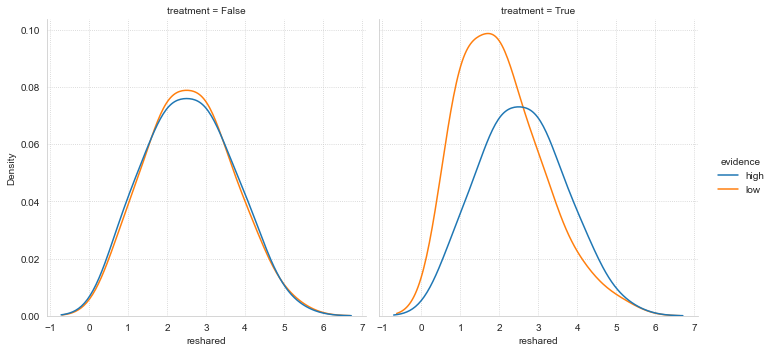

In [16]:
affirmations = posts.groupby(["PROLIFIC_ID","SESSION_ID","treatment","warning","evidence","affirms"])["reshared"].count()

sns.displot(data=pd.DataFrame(affirmations).reset_index(), 
            x="reshared",
            hue="evidence",
            col="treatment",
            bw_adjust=2,
            kind="kde")